# Climate Statistics Playbook

<p>
Mal Minhas, v0.1<br>
04.08.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 27.07.24. First version</li>
<li><b>v0.2</b>: 04.08.24. Added section on converting between C and CO2</li>
</ul>
</p>

### 1. Temperature and CO$^2$ measurements dataset

The guidance for this exercise is [provided here](https://docs.google.com/document/d/13CcdZRMIFoJOBpmBuBhkdcg62IPri2q9cLnFVyrrmBs/edit) from which:
> For this exercise, start by downloading [this Excel dataset](https://d32ogoqmya1dw8.cloudfront.net/files/enviro_data/activities/climate_change_module_dataset.xls) on global average temperatures and carbon dioxide levels, prepared by the nice folks at Project Eddie at Carleton University in the U.S.

> Note that “Vostok CO2” and “Vostok Temp” refer to data collected from ice core samples at the Russian Vostok Research Station located close to the South Pole. We are only going to work with the shorter term “Global Temperature” and “Mauna Loa CO2” data, but you should feel free to play around with the Vostok data too if you like. 

We will create two separate dataframes taking the CO$^2$ measurement data from the "Mauna Loa" tab and global average temperature from the "Global TEmperature" tab.  Note that some adjustment is needed to ensure only numeric value rows are picked up:

In [1]:
import pandas as pd
import numpy as np 

df_co2 = pd.read_excel('climate_change_module_dataset.xls', sheet_name='Mauna Loa CO2', header=1, 
                       dtype={'year': np.int64, 'mean CO2 (ppm)': np.float64})
df_co2.tail(5)

,year,mean CO2 (ppm)
53,2012,393.85
54,2013,396.52
55,2014,398.65
56,2015,400.83
57,2016,404.21


In [2]:
df_temperature = pd.read_excel('climate_change_module_dataset.xls', sheet_name='Global Temperature', header=4, 
                               nrows=135,
                               names=['year', 'mean temperature (celsius)'], 
                               dtype={'year': np.int64, 'mean CO2 (ppm)': np.float64})
df_temperature.tail()

,year,mean temperature (celsius)
130,2010,14.66
131,2011,14.55
132,2012,14.57
133,2013,14.60
134,2014,14.68


Now we will merge both dataframes along common year values to create a new dataframe `df`.  Common years run from 1959 to 2014:

In [3]:
df = pd.merge(df_co2, df_temperature, on='year')
df.year = df.year.astype(int)
df.tail()

,year,mean CO2 (ppm),mean temperature (celsius)
51,2010,389.90,14.66
52,2011,391.65,14.55
53,2012,393.85,14.57
54,2013,396.52,14.60
55,2014,398.65,14.68


Let's graph a scatterplot showing year on the y-axis and mean temperature on x-axis:

In [4]:
df.dtypes

year                            int64
mean CO2 (ppm)                float64
mean temperature (celsius)    float64
dtype: object

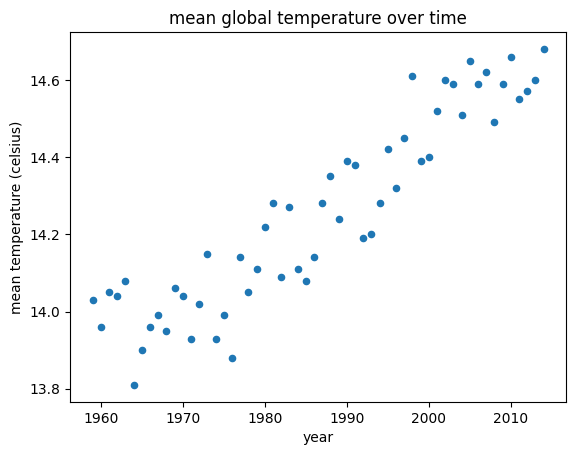

In [5]:
def drawScatterPlot(x, y, title):
    ax = df.plot(kind='scatter', x=x, y=y)
    ax.set_title(title)

drawScatterPlot('year', 'mean temperature (celsius)', 'mean global temperature over time')

Now let's draw that same data with a line of best fit added overlaid in red.

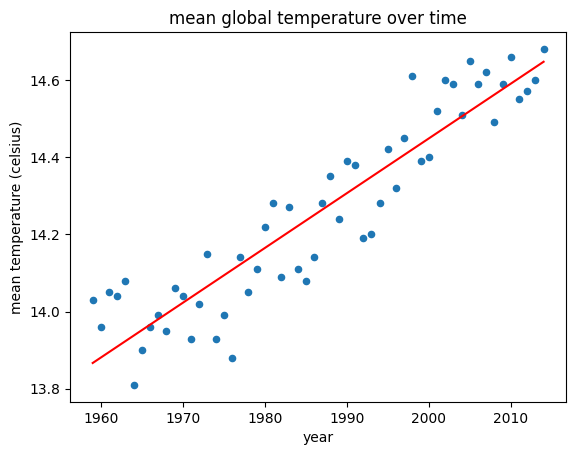

In [6]:
def drawScatterPlotWithRegression(x, y, title):
    ax = df.plot(kind='scatter', x=x, y=y)
    ax.set_title(title)
    # Calculate the line of best fit
    X = df[x]
    Y = df[y]
    m, b = np.polyfit(X, Y, 1)
    # Plot the line of best fit on the same axes
    ax.plot(X, m*X + b, color='red')

drawScatterPlotWithRegression('year', 'mean temperature (celsius)', 'mean global temperature over time')

Here's a graph of the CO$^2$ concentrations measured at Mauna Loa since 1959:

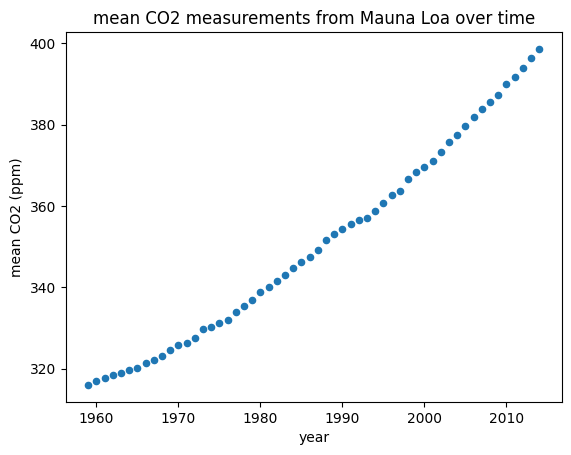

In [7]:
drawScatterPlot('year', 'mean CO2 (ppm)', 'mean CO2 measurements from Mauna Loa over time')

And here it is with a line of best fit overlaid in red:

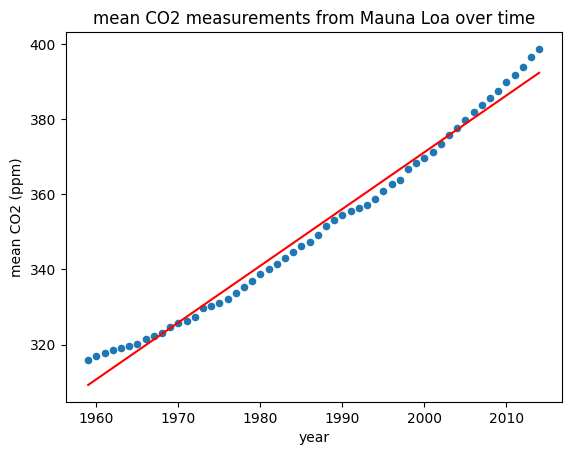

In [8]:
drawScatterPlotWithRegression('year', 'mean CO2 (ppm)', 'mean CO2 measurements from Mauna Loa over time')

In the next section we will work out how to calculate $R^2$ for the line of best fit

### 2. Calculating $R^2$ for temperature and CO$^2$ increases over time

We can use the stats package in `scipy` to calculate various values associated with linear regression including slope, intercept and r_value.  The function `rsquared` below returns the $R^2$ value rounded to 4 decimal places:

In [9]:
import scipy

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return round(r_value**2, 4)

def slopeAndIntercept(x, y):
    """ Return slope and intercept where x and y are array-like."""
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return slope, intercept

years = list(df.year)
temperatures = list(df['mean temperature (celsius)'])
co2measurements = list(df['mean CO2 (ppm)'])

def dumpAnalysis(x, y, xname, yname, measure):
    rsq = rsquared(x, y)
    roc = round(slopeAndIntercept(x, y)[0],3)
    print(f"Rsquared for {xname} vs. {yname} = {rsq} with rate of change of {roc} {measure}/year")

dumpAnalysis(years, temperatures, 'year', 'global temperature', 'degrees C')

Rsquared for year vs. global temperature = 0.8541 with rate of change of 0.014 degrees C/year


In [10]:
dumpAnalysis(years, co2measurements, 'year', 'CO2 measurements', 'ppm')

Rsquared for year vs. CO2 measurements = 0.9863 with rate of change of 1.51 ppm/year


Both $R^2$ values are high, close to 1, indicating that they explain reasonably well the proportion of variation.  This gives us confidence that global temperature and CO$^2$ concentrations have increased over time from the measurements given the correlation.

### 3. Temperature and CO$^2$ correlation

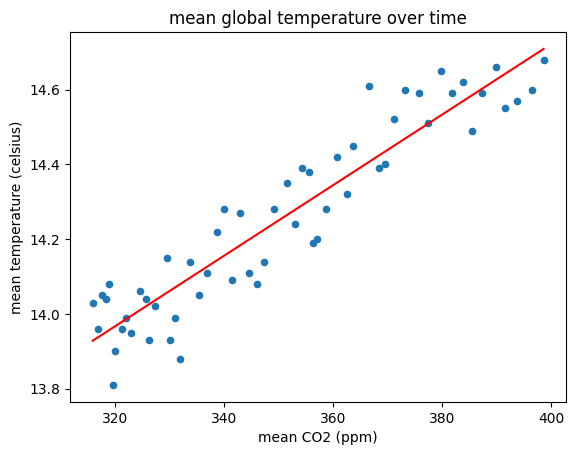

In [11]:
drawScatterPlotWithRegression('mean CO2 (ppm)', 'mean temperature (celsius)', 'mean global temperature over time')

In [12]:
dumpAnalysis(co2measurements, temperatures, 'CO2 measurements', 'temperatures', 'degrees C')

Rsquared for CO2 measurements vs. temperatures = 0.8744 with rate of change of 0.009 degrees C/year


There is strong correlation between CO$^2$ measurements and global temperature rise but as we know, correlation != causation.  Or per [the solution sheet](https://docs.google.com/document/d/1Xyy1emGJ0BVHZfGWxtasZSNEeVAslox_Lib9lAwQ51E/edit):

> From the graph and $R^2$ value, we can say with some confidence that increasing levels of CO$^2$ are a strong predictor for increasing global average temperatures, though other factors might also play a role. However, if we were to plot the same graph with CO$^2$ on y-axis and temperature on x-axis, we would also get a strong correlation, and in that case we would conclude that increasing temperatures explain increasing CO$^2$ levels. So while the correlation is strong, it does not imply there is a causal relationship. We need more info e.g. knowledge of the underlying radiative forcing effect of CO$^2$, and a more robust model that controls for other factors, to be able to say with more confidence that one “causes” the other.

### 3. Converting between $C$ and $CO^2$

We know from the chemistry of $C$ and $O^2$ the following:

$C  + O^2      = CO^2 + energy$<br>
12g + 16g x 2  = 44g + energy

Therefore each 1g of $C$ creates 3.67g of $CO^2$ or equivalently, 1g of $CO^2$ is $\frac{1}{3.67}$g $C$.

We also know that 1ppm atmospheric $CO^2$ is equivalent to 2.13$GtC$.  The total stock of carbon in the atmosphere can therefore be calculated knowing that we currently have 412ppm as 412 x 2.13 = $878GtC$.

In [13]:
def ppm_to_carbon(ppm):
    return ppm * 2.13

def carbon_to_co2(gt):
    return gt * 3.67

def co2_to_carbon(gt):
    return gt/3.67


**Q: India emitted a total of 2.3 Gt of CO2 in 2018 (not accounting for removal by sinks). By how much did this increase the stock of carbon in the atmosphere, assuming 55 percent was removed by sinks?**

In [14]:
# Step 1: calculate equivalent GtC emitted in 2018 in India
gtco2 = 2.3
gtc = co2_to_carbon(gtco2)
print(f"1. {gtco2}Gt CO2 is equivalent to {round(gtc, 3)}GtC Carbon")
# Step 2: calculate % that went into stock
gtcToSink = gtc*.45
print(f"2. 45% of this went into stock = {round(gtcToSink, 3)}GtC Carbon")
# Step 3: calculate total Carbon stock
ppm = 412
cstock = ppm_to_carbon(ppm)
print(f"3. Total Carbon stock @ {ppm}ppm = {round(cstock,0)} GtC Carbon")
# Step 4: calculate % of total stock that was emitted in 2018
print(f"4. {round(gtcToSink, 3)}GtC Carbon from {round(cstock,0)}GtC \
total stock is {round((gtc/cstock) * 100 * .45, 2)}%")

1. 2.3Gt CO2 is equivalent to 0.627GtC Carbon
2. 45% of this went into stock = 0.282GtC Carbon
3. Total Carbon stock @ 412ppm = 878.0 GtC Carbon
4. 0.282GtC Carbon from 878.0GtC total stock is 0.03%


**Q: In 2021, the U.S.A. emitted 5.0 Gt of CO2. The population of the U.S.A. was 332 million. World population was 7.9 billion. If all humans in the world emitted as much CO2 as an American, by how much would the total stock of C gone up?**

In [15]:
# Step 1: calculate equivalent GtC emitted in 2021 in the US
gtco2 = 5.0
gtc = co2_to_carbon(gtco2)
print(f"1. {gtco2}Gt CO2 is equivalent to {round(gtc, 3)}GtC Carbon")
# Step 2: calculate % that went into stock
gtcToSink = gtc*.45
print(f"2. 45% of this went into stock = {round(gtcToSink, 3)}GtC Carbon")
# Step 3: calculate % of population
us_pop = 332
world_pop = 7900
us_world = us_pop/world_pop
print(f"3. {us_pop}m US population out of {world_pop}m world population = {round(us_world*100, 3)}%")
# Step 4: calculate equivalent if ever
print(f"4. {round(gtcToSink/us_world,1)}GtC equivalent if everyone was American.")

1. 5.0Gt CO2 is equivalent to 1.362GtC Carbon
2. 45% of this went into stock = 0.613GtC Carbon
3. 332m US population out of 7900m world population = 4.203%
4. 14.6GtC equivalent if everyone was American.


**Q: The concentration of CO2 in the atmosphere has increased from about 367 ppm in the year 2000 to about 421 ppm today. About how much carbon have humans emitted in this time? Assume all of the increase is due to human activities and the sinks of the ocean and on land have absorbed about 55 percent of the anthropogenic emissions. Remember that an increase of 1 ppm of atmospheric CO2 = 2.13 GtC.**

In [16]:
# Step 1: calculate Carbon stock addition to atmosphere
rise = 421-367
cstock = ppm_to_carbon(rise)
print(f"1. Increase of {round(cstock,2)}GtC Carbon in atmosphere from {rise}ppm rise\
in ppm from 367ppm in 2000 to 421ppm today")
# Step 2: calculate total emissions assuming the atmospheric component is just 45%
print(f"2. Total increase in Carbon stock = {round(cstock/0.45,2)}GtC Carbon")

1. Increase of 115.02GtC Carbon in atmosphere from 54ppm risein ppm from 367ppm in 2000 to 421ppm today
2. Total increase in Carbon stock = 255.6GtC Carbon


Time to take another kind of stock and consider the [climate stripes](https://showyourstripes.info/):

<div>
<img src="GLOBE---1850-2023-MO.png" width="600"/>
</div>